![Title](Images/cisco.png)

# Lab - estadísticas descriptivas en Python


### Aspectos básicos

En esta práctica de laboratorio, importará un conjunto de datos en una trama de pandas y generará estadísticas descriptivas de los datos. Formateará cadenas de texto para informar las estadísticas descriptivas y generará un diagrama de los datos. Por último, experimentará con los parámetros del gráfico para familiarizarse con la diagramación de datos mediante la biblioteca matplotlib.pyplot.

## Part 1: Análisis de los datos

#### Step 1: configure el entorno e importe los datos

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# permite incorporar las gráficas al documento, sin abrir nueva ventana
%matplotlib inline

b) Importamos los datos del archivo `rpi_describe.csv`

In [4]:
data = pd.read_csv ('rpi_data_processed.csv')

c) Verifique que el archivo se ha importado correctamente.

In [5]:
data.head() #verificamos las 5 primeras filas

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


In [6]:
data.tail(5) #verificamos las 5 últimas filas

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
668,2016-11-24,19:15:32,20.952,88.67,14.35
669,2016-11-24,19:16:04,19.397,84.86,14.35
670,2016-11-24,19:16:34,20.117,84.99,14.33
671,2016-11-24,19:17:04,17.995,86.21,6.88
672,2016-11-24,19:18:16,22.175,85.69,14.23


#### Step 2: Utilizamos pandas para visualizar la tabla de estadísticas descriptivas para el archivo.

a) El método `dataframe.describe()` muestra estadísticas básicas.

In [7]:
data.describe()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
count,673.000000,673.000000,673.000000
mean,21.115452,90.449212,13.697608
std,5.161225,3.465647,1.080471
min,16.167000,58.480000,6.210000
25%,19.115000,90.220000,13.640000
50%,20.322000,91.560000,13.980000
75%,21.843000,92.070000,14.180000
max,76.528000,92.870000,14.550000


b) Para trabajar con los valores redondeados de los pesos en el conjunto de datos, puede agregar una nueva columna a los valores redondeados.
En pandas, se accede a las columnas por sus encabezados. Para crear una nueva columna, se utiliza el nombre de la nueva columna, entre comillas, entre corchetes como índice para el marco de datos. 
El método `round()` se utiliza para redondear los valores en la columna peso y completar una nueva columna con los valores redondeados.

In [23]:
# Añadir nueva columna al dataframe donde redondear columna Ping
data['rounded'] = data['Ping (ms)'].round(2)

# Verify that values were added.
data.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s),rounded
0,2016-11-24,13:36:25,26.99,91.80,14.31,26.99
1,2016-11-24,13:36:55,24.53,88.19,14.12,24.53
2,2016-11-24,13:37:25,20.23,59.86,14.11,20.23
3,2016-11-24,13:37:57,19.33,91.81,14.22,19.33
4,2016-11-24,13:38:27,22.49,92.05,14.08,22.49


c) También es posible completar una columna con valores calculados. 

<pre><code>dataframe['c'] = dataframe['a'] - dataframe['b']</code></pre>

In [25]:
# Create the new column named "diff" and fill it with values por encima o debajo de valor objetivo de 20 onzas.
data['diff'] = data['Ping (ms)'] - 20

# Check the result.
data.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s),rounded,diff
0,2016-11-24,13:36:25,26.99,91.80,14.31,26.99,6.99
1,2016-11-24,13:36:55,24.53,88.19,14.12,24.53,4.53
2,2016-11-24,13:37:25,20.23,59.86,14.11,20.23,0.23
3,2016-11-24,13:37:57,19.33,91.81,14.22,19.33,-0.67
4,2016-11-24,13:38:27,22.49,92.05,14.08,22.49,2.49


#### Step 3: Visualizar las estadísticas descriptivas en texto

a) Utilice los valores de la columna redondeada del dataFrame para crear una variable para cada estadística, calcule el rango de valores mediante min() y max() para calcular el rango de valores.

In [81]:
count = data.rounded.count()
mean = data.rounded.mean()
std = data.rounded.std()
max = data.rounded.max()
min = data.rounded.min()
rng = max-min

In [58]:
data.rounded.describe()

count    673.000000
mean      21.115542
std        5.161198
min       16.170000
25%       19.110000
50%       20.320000
75%       21.840000
max       76.530000
Name: rounded, dtype: float64

b) Para desarrollar cadenas que utilicen texto y variables para informar sobre las estadísticas del conjunto de datos, utilice el método de cadena `format()` para facilitar la inserción de los valores de las variables en las cadenas. El formateo utiliza marcadores `{}` para indicar dónde deben insertarse los valores de las variables.

Desarrolle oraciones como “La media de la distribución es…” para cada variable creada. En la última oración, incluya `min()`, `max()` y los valores de rango en las mismas oraciones para practicar el uso de varios marcadores.

In [82]:
countstring = 'El número de valores en la serie es {}'.format(count)
print(countstring)

meanstring ='la media de la distribución es {:.2f}'.format(mean)
print(meanstring)

stdstring = 'The standard deviation of the distribution is {:.2f}.'.format(std)
print(stdstring)

rangestring ='El rango del dataframe es {}'.format(rng)
print (rangestring)

El número de valores en la serie es 673
la media de la distribución es 21.12
The standard deviation of the distribution is 5.16.
El rango del dataframe es 60.36


## Part 2: Visualización de los datos

#### Step 1: Cree un dataframe que contenga los conteos de frecuencia para el dataset.

a) Cree un nuevo dataframe usando el método `value_counts()` en la columna rounded, que crea un objeto de serie.  Utilizará `to_frame()` con los métodos `reset_index()` para crear un marco de datos de pandas a partir del objeto de serie.

Example

<pre><code>variable = dataframe['columnName'].value_counts()</code></pre>

In [83]:
# Create a variable called 'freq' to hold the weight values and their frequencies
freq = data['rounded'].value_counts()

# Convert the freq object to a data frame. Use to_frame().
freq = freq.to_frame().reset_index()


b) Use la función `type()` con el nombre de la variable como argumento para verificar que `freq` no sea un objeto del dataframe.

In [84]:
# Verify the type of the freq object.
type(freq)

pandas.core.frame.DataFrame

c) Use `head` para ver el new dataframe. Las columnas del marco de datos no tienen un nombre claro. Cámbieles el nombre a "value" y "freq" mediante el atributo de las columnas del dataframe.
<pre><code>dataframe.columns = ['column1','column2']</code></pre>

In [87]:
# Rename the columns in the dataframe. 
freq.columns = ['value', 'freq']

# Verify the result.
freq.head()

,value,freq
0,19.76,6
1,20.12,4
2,18.76,4
3,19.11,4
4,18.90,4


#### Step 2: Gráfico de la distribución de frecuencia.

a) Los métodos del módulo `matplotlib.pyplot` se utilizan para formatear y mostrar un diagrama de dispersión de los datos de frecuencia.

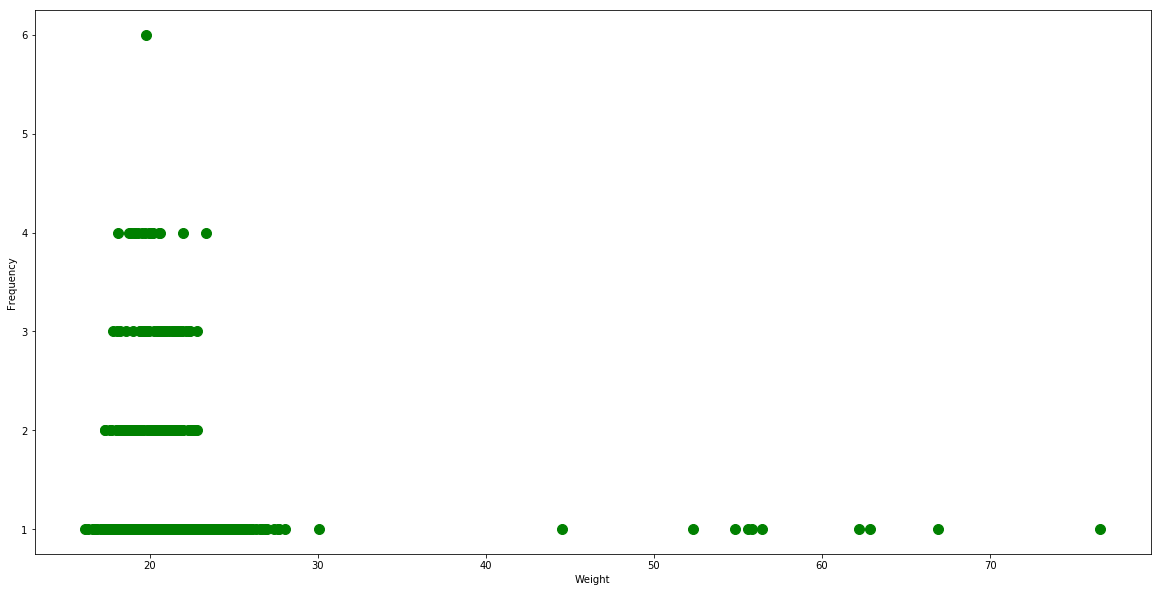

In [88]:
# Set a size for the graph
plt.figure(figsize=(20,10))

# Add axis labels
plt.ylabel('Frequency')
plt.xlabel('Weight')

# Plot the graph using a round symbol "o" of size 10
plt.plot(freq.value,freq.freq, "o", markersize = 10, color = 'g')

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>